In [71]:
import tensorflow as tf
import numpy as np

In [56]:
import pandas as pd

In [1]:
%%bigquery df
select * from egon-ongcp-demos.g_play.amostra

In [ ]:
df.dtypes

In [ ]:
labels = df.pop('convertido')

In [64]:
idade = pd.cut(df['idade'],5, labels=[1,2,3,4,5])
idade_one_hot = pd.get_dummies(idade)
idade_one_hot.columns = ['idade_1', 'idade_2', 'idade_3', 'idade_4', 'idade_5']

In [66]:
df_limpo = df.drop(columns=['id','idade'])

In [69]:
df_final = pd.concat([df_limpo, idade_one_hot], axis=1, sort=False)

In [72]:
type(df_final)

pandas.core.frame.DataFrame

In [177]:
df_final.head()

,sexo,D1,D2,D3,D4,D5,D6,D7,tr,pa,...,dc3,dc4,dc5,dc6,dc7,idade_1,idade_2,idade_3,idade_4,idade_5
0,0,0,0,0,1,0,0,0,1,1,...,0.0,0.0,0.771981,0.228019,0.0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,1,1,...,0.0,0.0,0.000000,0.000000,0.0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,1,1,...,0.0,0.0,0.000000,0.000000,0.0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.000000,0.000000,0.0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.000000,0.000000,0.0,1,0,0,0,0


In [178]:
labels.head()

0    0
1    1
2    1
3    0
4    0
Name: convertido, dtype: int64

In [151]:
df_final.to_numpy()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.]])

In [179]:
type(df_final)

pandas.core.frame.DataFrame

In [180]:
type(labels)

pandas.core.series.Series

In [181]:
dataset = tf.data.Dataset.from_tensor_slices((df_final.values, labels.values))

In [186]:
dataset = dataset.shuffle(len(df)).batch(32)

In [213]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)    
])

In [214]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [215]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch / 5))

In [211]:
1e-3 * 10**(4 / 5)

0.006309573444801934

In [216]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)

In [217]:
model.compile(loss=loss, optimizer=optimizer,
             metrics=['accuracy'])

In [218]:
history = model.fit(dataset, epochs= 10)

Train for 98 steps
Epoch 1/10
98/98 [==============================] - 10s 106ms/step - loss: 1.0067 - accuracy: 0.5209
Epoch 2/10
98/98 [==============================] - 9s 96ms/step - loss: 0.6410 - accuracy: 0.6013
Epoch 3/10
98/98 [==============================] - 9s 96ms/step - loss: 0.6371 - accuracy: 0.6085
Epoch 4/10
98/98 [==============================] - 9s 94ms/step - loss: 0.6367 - accuracy: 0.6045
Epoch 5/10
98/98 [==============================] - 9s 92ms/step - loss: 0.6356 - accuracy: 0.6053
Epoch 6/10
98/98 [==============================] - 9s 94ms/step - loss: 0.6350 - accuracy: 0.6066
Epoch 7/10
98/98 [==============================] - 9s 96ms/step - loss: 0.6349 - accuracy: 0.6050
Epoch 8/10
98/98 [==============================] - 9s 92ms/step - loss: 0.6341 - accuracy: 0.6043
Epoch 9/10
98/98 [==============================] - 9s 93ms/step - loss: 0.6329 - accuracy: 0.6079
Epoch 10/10
98/98 [==============================] - 10s 97ms/step - loss: 0.6331 - accu

In [208]:
from matplotlib import pyplot as plt

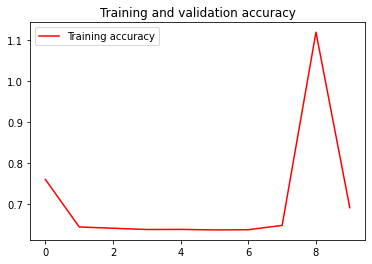

<Figure size 432x288 with 0 Axes>

In [210]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()